In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from src.utils import save_figure

# Get datasets

In [2]:
me_snrs = [10, 80]
white_snrs = [-10, 0, 10, 20, 50, 80]
colors = {str(white_snrs[i]):plt.cm.tab10.colors[i] for i in range(len(white_snrs))}

def get_dataset(dataset_path):
    X = np.load(os.path.join(dataset_path, "X.npy"))
    y_reg = np.load(os.path.join(dataset_path, "y_reg.npy"))
    return X, y_reg

datasets = {}

for dataset in os.listdir("../simulated_data/"):
    if dataset.startswith("DS"):
        X, y_reg = get_dataset(f"../simulated_data/{dataset}")
        datasets[dataset] = {'X': X, 'y_reg':y_reg}

datasets

{'DS_0_10_10': {'X': array([[ 314.56744176,  237.08407602,  -60.97928299, ...,  342.62964001,
           416.03901381, -390.35831203],
         [-398.90633071, -324.36363736,  268.52963769, ..., -265.91040476,
           239.77441544,  -12.73413777],
         [-486.41387862,  -96.22424942, -504.38549655, ..., -207.61568838,
          -254.15077911,  254.81274196],
         ...,
         [ 109.54737455,  -97.29802009,   79.61042499, ...,  588.75540917,
           -31.74154443, -175.64689246],
         [ 572.07469858, -116.24540965,  197.87130598, ...,  140.82025255,
          -157.7771712 ,  -92.84546619],
         [-147.60436452, -252.26436944, -715.37384492, ...,   45.95314316,
           711.48258358, -478.88445922]]),
  'y_reg': array([ 0.,  0.,  0., ..., 66., 52., 92.])},
 'DS_80_10_10': {'X': array([[-73.03755587, -69.68741999, -60.93469336, ...,  60.55495738,
           64.73525016,  67.38373422],
         [-73.11392887, -69.94792968, -61.14014901, ...,  60.53521269,
           6

# Distribution

In [3]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Function to calculate summary statistics for each dataset
def summarize_statistics(data):
    stats_summary = {}
    
    # Flatten the data to compute statistics across all points
    flattened_data = data.flatten()
    
    # Mean
    stats_summary['Mean'] = np.mean(flattened_data)
    
    # Standard Deviation
    stats_summary['Standard Deviation'] = np.std(flattened_data)
    
    # Minimum and Maximum (Range)
    stats_summary['Min'] = np.min(flattened_data)
    stats_summary['Max'] = np.max(flattened_data)
    
    # Median
    stats_summary['Median'] = np.median(flattened_data)
    
    # IQR (Interquartile Range)
    stats_summary['IQR'] = stats.iqr(flattened_data)
    
    # Kurtosis
    stats_summary['Kurtosis'] = stats.kurtosis(flattened_data, fisher=True)
    
    # Skewness
    stats_summary['Skewness'] = stats.skew(flattened_data)
    
    return stats_summary


# List to store summary statistics for all datasets
summary_stats = []

# Calculate summary statistics for each dataset
for dataset_name, data in datasets.items():
    stats_summary = summarize_statistics(data['X'])  # Compute stats for X
    stats_summary['Dataset'] = dataset_name  # Add dataset name for identification
    summary_stats.append(stats_summary)

# Calculate overall statistics by combining all datasets
all_data = np.concatenate([data['X'].flatten() for data in datasets.values()])
overall_stats = summarize_statistics(all_data)
overall_stats['Dataset'] = 'Overall Average'
summary_stats.append(overall_stats)

# Convert summary stats to a DataFrame for easier viewing
summary_df = pd.DataFrame(summary_stats).set_index('Dataset')
print(summary_df)

# Save the DataFrame as a CSV file for further analysis if needed
summary_df.to_csv("summary_statistics.csv")


                     Mean  Standard Deviation           Min           Max  \
Dataset                                                                     
DS_0_10_10       0.105770          529.275518  -3447.420470   3500.223988   
DS_80_10_10      0.021827          158.862692   -879.108852    632.962376   
DS_-10_80_10     0.086432         1596.805175 -11077.026521  10707.666697   
DS_0_80_10      -0.095094          505.003124  -3502.842024   3386.013627   
DS_10_10_10      0.048366          225.188977  -1653.891390   1502.302280   
DS_20_80_10     -0.170651           51.029826   -355.259220    339.037268   
DS_50_10_10      0.022084          158.869960   -878.741700    629.892750   
DS_-10_10_10     0.287296         1604.593704 -10978.428015  10486.249792   
DS_10_80_10     -0.152498          159.849381  -1107.674582   1070.703633   
DS_50_80_10     -0.178780            7.534345   -192.509965    101.035505   
DS_80_80_10     -0.179038            7.363159   -192.454945     99.592105   

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots: one for each ME SNR
fig, axes = plt.subplots(1, 2)  # Two subplots side by side

for i, me_snr in enumerate(me_snrs):
    sns.set(style="whitegrid")
    
    for j, white_snr in enumerate(white_snrs):
        dataset_key = f"DS_{white_snr}_{me_snr}_10"
        dataset_data = datasets[dataset_key]["X"].flatten()  # Flatten data for KDE plot
        
        # Plot on the appropriate subplot
        sns.kdeplot(
            dataset_data, 
            lw=2, 
            label=f"White SNR: {white_snr}", 
            color=colors[str(white_snr)], 
            ax=axes[i]
        )
    
    # Set plot details for the current subplot
    axes[i].set_title(f'ME SNR: {me_snr}')
    axes[i].set_xlabel(r'Signal Amplitude')
    axes[i].set_ylabel(r'Density')
    axes[i].set_xlim(-4000, 4000)
    axes[i].set_ylim(0, 0.004)
    if i == 1: 
        axes[i].legend(title='White noise SNR', loc='center right', bbox_to_anchor=(1.6, 0.5))

# Adjust layout and save the figure
        
fig.suptitle('Distributions Across White Noise and ME SNRs', 
    y=0.95)
fig.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.1, wspace=0.7)
save_figure('distributions_me_snr', width=6, height=4)


# PSD

In [7]:
from scipy.signal import welch

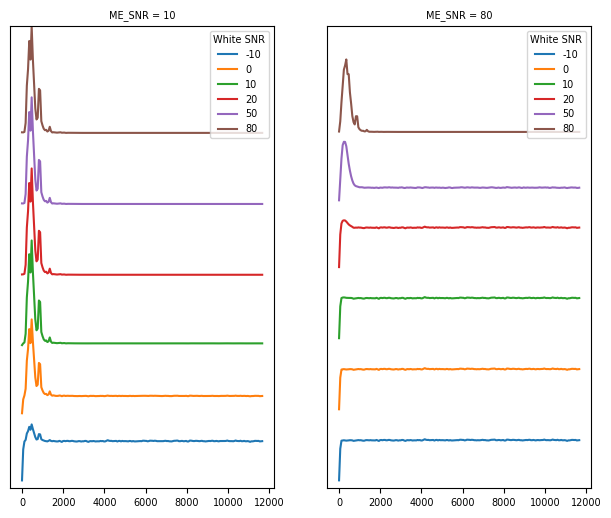

In [107]:
num_freq_to_show = 200
fs = 30000

# get tab:10 from plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.set_size_inches(7.5,6)

for i, me_snr in enumerate(me_snrs):

    for j, white_snr in enumerate(white_snrs):
        average_Pxx = np.zeros(512//2 + 1)
        for sample_id in range(3000):
            X = datasets[f"DS_{white_snr}_{me_snr}_10"]["X"]
            f, Pxx = welch(X[sample_id], fs, nperseg=512)
            Pxx = Pxx/Pxx.max()
            average_Pxx += Pxx
        average_Pxx /= 10
        axs[i].plot(f[:num_freq_to_show], average_Pxx[:num_freq_to_show] + 200*j, label=white_snr, c=colors[str(white_snr)])
        axs[i].set_title(f"ME_SNR = {me_snr}")
        axs[i].legend(title='White SNR', loc='upper right')
        axs[i].set_ylim([0, 1300])
        axs[i].set_yticks([])
plt.show()